# Comparing Bianchi2012 channel kinetics at ModelDB with the MOOSE transcribed version

In [21]:
import moose
import rdesigneur as rd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.


<IPython.core.display.Javascript object>


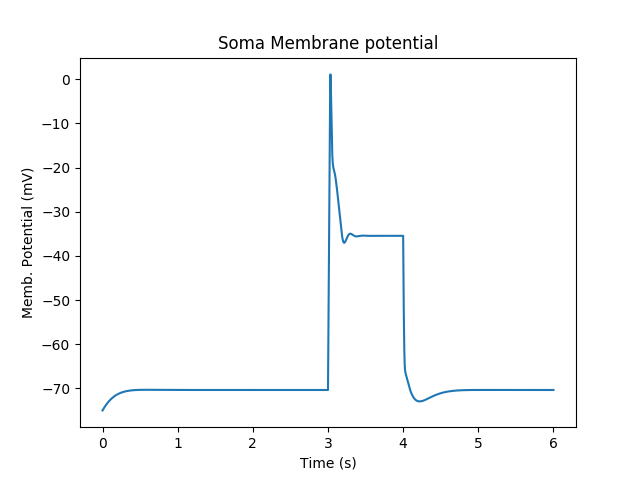

In [25]:
#%%capture

Vmvmin = -100
Vmvmax = 100
Vmvdivs = 3000
dVmv = (Vmvmax-Vmvmin)/Vmvdivs
Vmv = np.arange(Vmvmin,Vmvmax+dVmv, dVmv)

Vvmin = -0.100
Vvmax = 0.100
Vvdivs = 3000
dVv = (Vvmax-Vvmin)/Vvdivs
Vv = np.arange(Vvmin,Vvmax+dVv, dVv)

Camin = 0
Camax = 3e-3
Cadivs = 3000
dCa = (Camax-Camin)/Cadivs
Ca = np.arange(Camin,Camax+dCa, dCa)

celsius = 34
F = 96485.3
R = 8.314

exec(open('/home/analkumar2/Thesis/Thesis work/Bianchi2002_WT_CA1/CA1_WT.py').read())

## Na_SChan

In [34]:
tha  =  -25
qa   = 7.2
Ra   = 0.4
Rb   = 0.124
thi1  = -45
thi2  = -45 
qd   = 1.5
qg   = 1.5
mmin=0.02
hmin=0.5
q10=3
Rg   = 0.01
Rd   = .03
qq   = 10
tq   = -55
thinf  = -50
qinf  = 2
vhalfs=-60
a0s=0.0003
zetas=12
gms=0.2
smax=10
vvh=-58
vvs=2
ar2=1
celsius = 34

alpv = 1/(1+np.exp((Vmv-vvh)/vvs))
alps = np.exp(1.e-3*zetas*(Vmv-vhalfs)*9.648e4/(8.315*(273.16+celsius)))
bets = np.exp(1.e-3*zetas*gms*(Vmv-vhalfs)*9.648e4/(8.315*(273.16+celsius)))

def trap0(v,th,a,q):
    if abs(v-th)>1e-6:
        return a * (v - th) / (1 - np.exp(-(v - th)/q))
    else:
        return a * q
        
qt=q10**((celsius-24)/10)
a = np.array([trap0(vm,tha,Ra,qa) for vm in Vmv])
b = np.array([trap0(-vm,-tha,Rb,qa) for vm in Vmv])
mtau = 1/(a+b)/qt
mtau[mtau<mmin]=mmin
minf = a/(a+b)

a = np.array([trap0(vm,thi1,Rd,qd) for vm in Vmv])
b = np.array([trap0(-vm,-thi2,Rg,qg) for vm in Vmv])
htau =  1/(a+b)/qt
htau[htau<hmin] = hmin
hinf = 1/(1+np.exp((Vmv-thinf)/qinf))
c=alpv
sinf = c+ar2*(1-c)
taus = bets/(a0s*(1+alps))
taus[taus<smax] = smax

print(f'The opening probability at Erest(-0.070V) is {minf[np.abs(Vmv + 70).argmin()]**3 * hinf[np.abs(Vmv + 70).argmin()] * sinf[np.abs(Vmv + 70).argmin()]}')

The opening probability at Erest(-0.070V) is 2.3702023004525377e-07


### Xgate

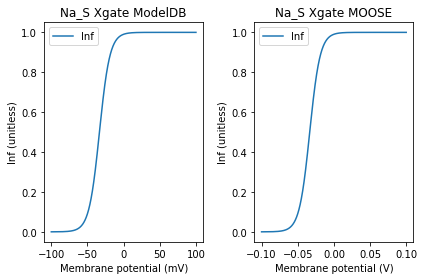

In [6]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, minf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('Na_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateX = moose.element('/library/Na_Schan/gateX')
plt.plot(Vv,gateX.tableA/gateX.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('Na_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

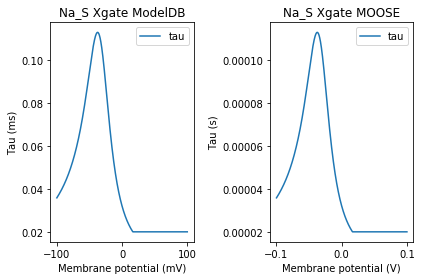

In [7]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, mtau, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('Na_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateX.tableB))/gateX.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('Na_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

### Ygate

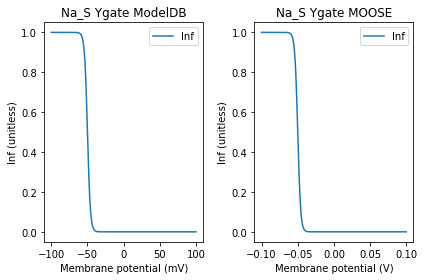

In [8]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, hinf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('Na_S Ygate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateY = moose.element('/library/Na_Schan/gateY')
plt.plot(Vv,gateY.tableA/gateY.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('Na_S Ygate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

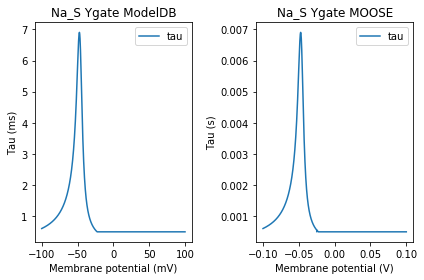

In [9]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, htau, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('Na_S Ygate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateY.tableB))/gateY.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('Na_S Ygate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

### Zgate

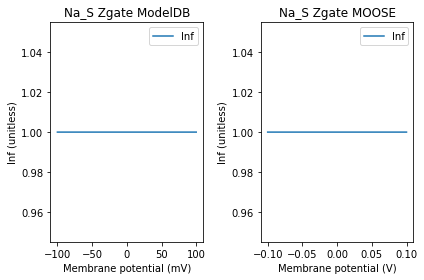

In [10]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, sinf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('Na_S Zgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateZ = moose.element('/library/Na_Schan/gateZ')
plt.plot(Vv,gateZ.tableA/gateZ.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('Na_S Zgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

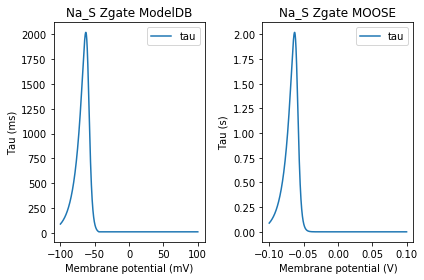

In [11]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, taus, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('Na_S Zgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateZ.tableB))/gateZ.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('Na_S Zgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

## KDR_SChan

In [33]:
vhalfn=13
a0n=0.02
zetan=-3
gmn=0.7
nmax=2
q10=1

alpn = np.exp(1.e-3*zetan*(Vmv-vhalfn)*9.648e4/(8.315*(273.16+celsius)))
betn = np.exp(1.e-3*zetan*gmn*(Vmv-vhalfn)*9.648e4/(8.315*(273.16+celsius)))
qt=q10**((celsius-24)/10)
a = alpn
ninf = 1/(1+a)
taun = betn/(qt*a0n*(1+a))
taun[taun<nmax]=nmax

print(f'The opening probability at Erest(-0.070V) is {ninf[np.abs(Vmv + 70).argmin()]}')

The opening probability at Erest(-0.070V) is 8.221397958129959e-05


### Xgate

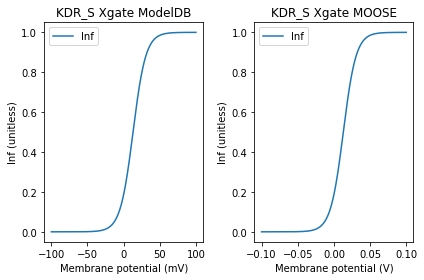

In [13]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, ninf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('KDR_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateX = moose.element('/library/KDR_Schan/gateX')
plt.plot(Vv,gateX.tableA/gateX.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('KDR_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

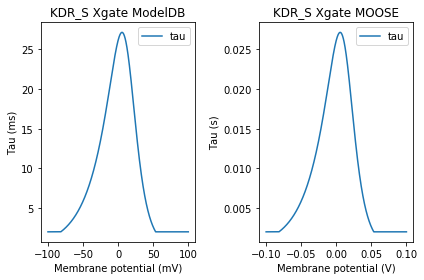

In [14]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, taun, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('KDR_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateX.tableB))/gateX.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('KDR_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

## KA_SChan

In [35]:
vhalfn = 11
vhalfl = -56
a0n = 0.05
zetan = -1.5
zetal = 3
gmn = 0.55
gml = 1
lmin = 2
nmin = 0.1
pw = -1
tq = -40
qq = 5
q10 = 5

qt = q10**((celsius-24)/10)
zeta = zetan+pw/(1+np.exp((Vmv-tq)/qq))
alpn = np.exp(1.e-3*zeta*(Vmv-vhalfn)*9.648e4/(8.315*(273.16+celsius))) 
zeta = zetan+pw/(1+np.exp((Vmv-tq)/qq))
betn = np.exp(1.e-3*zeta*gmn*(Vmv-vhalfn)*9.648e4/(8.315*(273.16+celsius)))
alpl = np.exp(1.e-3*zetal*(Vmv-vhalfl)*9.648e4/(8.315*(273.16+celsius)))
betl = np.exp(1.e-3*zetal*gml*(Vmv-vhalfl)*9.648e4/(8.315*(273.16+celsius)))

a = alpn
ninf = 1/(1 + a)
taun = betn/(qt*a0n*(1+a))
taun[taun<nmin]=nmin
a = alpl
linf = 1/(1+ a)
taul = 0.26*(Vmv+50)
taul[taul<lmin] = lmin

print(f'The opening probability at Erest(-0.070V) is {ninf[np.abs(Vmv + 70).argmin()] * linf[np.abs(Vmv + 70).argmin()]}')

The opening probability at Erest(-0.070V) is 0.0003981727183712047


### Xgate

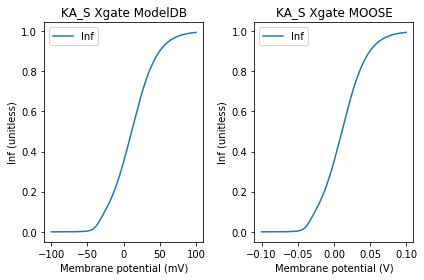

In [16]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, ninf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('KA_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateX = moose.element('/library/KA_Schan/gateX')
plt.plot(Vv,gateX.tableA/gateX.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('KA_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

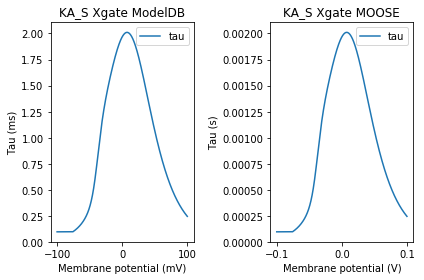

In [17]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, taun, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('KA_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateX.tableB))/gateX.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('KA_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

### Ygate

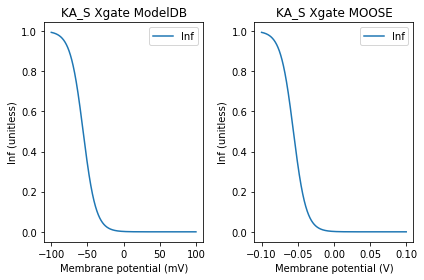

In [18]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, linf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('KA_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateY = moose.element('/library/KA_Schan/gateY')
plt.plot(Vv,gateY.tableA/gateY.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('KA_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

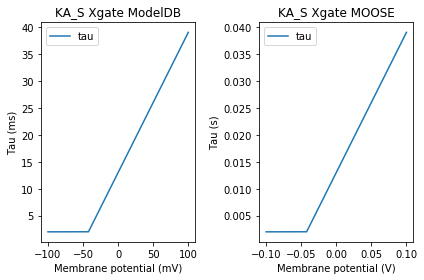

In [19]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, taul, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('KA_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateY.tableB))/gateY.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('KA_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

## KM_Chan

In [16]:
vhalfl=-42
kl=-4
vhalft=-42
a0t=0.04
zetat=4
gmt=.7
q10=5
b0=60

alpt = np.exp(0.0378*zetat*(Vmv-vhalft))
bett = np.exp(0.0378*zetat*gmt*(Vmv-vhalft))
qt=q10**((celsius-35)/10)
inf = (1/(1 + np.exp((Vmv-vhalfl)/kl)))
a = alpt
tau = b0 + bett/(a0t*(1+a))

print(f'The opening probability at Erest(-0.065V) is {inf[np.abs(Vmv + 65).argmin()]}')

The opening probability at Erest(-0.065V) is 0.0031726828424836163


### Xgate

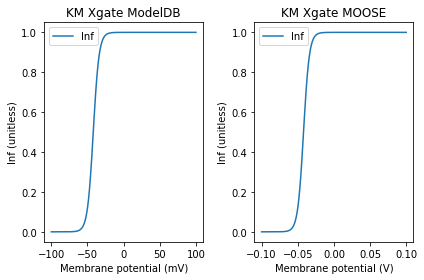

In [21]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, inf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('KM Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateX = moose.element('/library/KM_chan/gateX')
plt.plot(Vv,gateX.tableA/gateX.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('KM Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

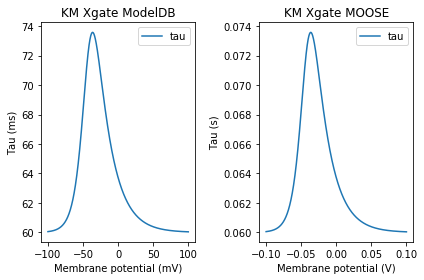

In [22]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, tau, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('KM Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateX.tableB))/gateX.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('KM Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

## h_Chan

In [17]:
ena    = 50
K      = 8.5
vhalf  = -81

taun = 5*(1/(np.exp((Vmv+145)/-17.5)+np.exp((Vmv+16.8)/16.5)) + 5)
taun[Vmv>-30] = 1
ninf = 1 - (1 / (1 + np.exp((vhalf - Vmv)/K)))

print(f'The opening probability at Erest(-0.065V) is {ninf[np.abs(Vmv + 65).argmin()]}')

The opening probability at Erest(-0.065V) is 0.13211884356389736


### Xgate

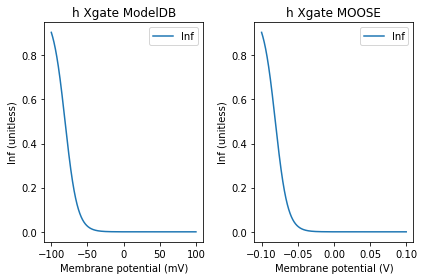

In [24]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, ninf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('h Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateX = moose.element('/library/h_chan/gateX')
plt.plot(Vv,gateX.tableA/gateX.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('h Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

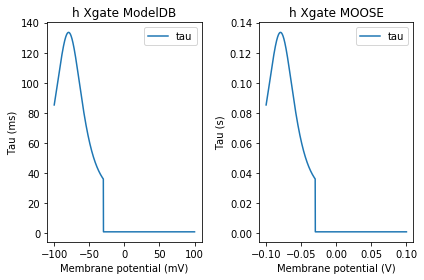

In [25]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, taun, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('h Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateX.tableB))/gateX.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('h Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

## CaT_Chan

In [26]:
tBase = 23.5
celsius = 22
ki = 0.001
cai = 5.e-5
cao = 2
tfa = 1
tfi = 0.68
eca = 140

h2 = ki/(ki+Ca)
alph = 1.6e-4*np.exp(-(Vmv+57)/19)
beth = 1/(np.exp((-Vmv+15)/10)+1.0)
alpm = 0.1967*(-1.0*Vmv+19.88)/(np.exp((-1.0*Vmv+19.88)/10.0)-1.0)
betm = 0.046*np.exp(-Vmv/22.73)
a = alpm
taum = 1/(tfa*(a + betm))
minf =  a/(a+betm)
a = alph
tauh = 1/(tfi*(a + beth))
hinf = a/(a+beth)

### Xgate

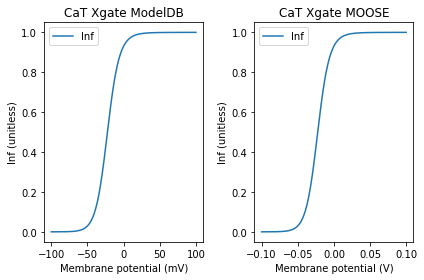

In [27]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, minf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('CaT Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateX = moose.element('/library/CaT_chan/gateX')
plt.plot(Vv,gateX.tableA/gateX.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('CaT Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

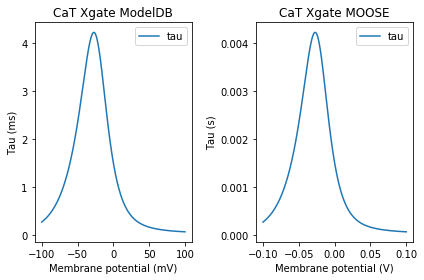

In [28]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, taum, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('CaT Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateX.tableB))/gateX.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('CaT Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

### Ygate

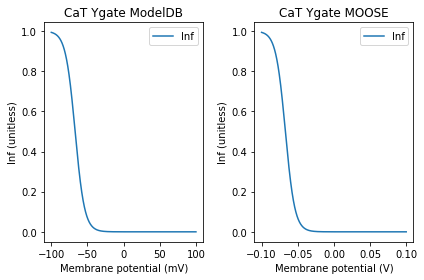

In [29]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, hinf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('CaT Ygate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateY = moose.element('/library/CaT_chan/gateY')
plt.plot(Vv,gateY.tableA/gateY.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('CaT Ygate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

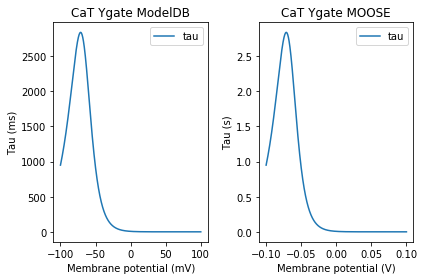

In [30]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, tauh, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('CaT Ygate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateY.tableB))/gateY.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('CaT Ygate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

### Zgate

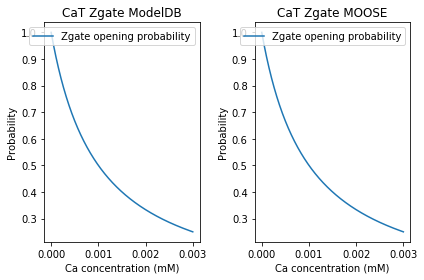

In [31]:
plt.subplot(1, 2, 1)
plt.plot(Ca, h2, label='Zgate opening probability')
plt.xlabel('Ca concentration (mM)')
plt.ylabel('Probability')
plt.title('CaT Zgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateZ = moose.element('/library/CaT_chan/gateZ')
plt.plot(Ca,gateZ.tableA, label='Zgate opening probability')
plt.xlabel('Ca concentration (mM)')
plt.ylabel('Probability')
plt.title('CaT Zgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

## CaR_SChan

In [32]:
eca = 140
celsius =34

mtau = 100+0*Vmv
minf = 1 / (1 + np.exp((Vmv+60)/(-3)))
htau = 5+0*Vmv
hinf = 1/ (1 + np.exp((Vmv+62)/(1)))

### Xgate

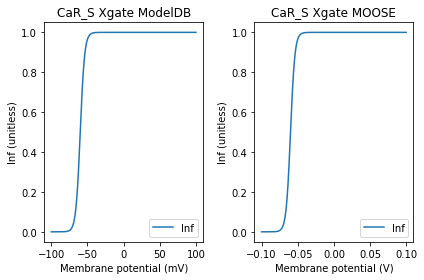

In [33]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, minf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('CaR_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateX = moose.element('/library/CaR_Schan/gateX')
plt.plot(Vv,gateX.tableA/gateX.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('CaR_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

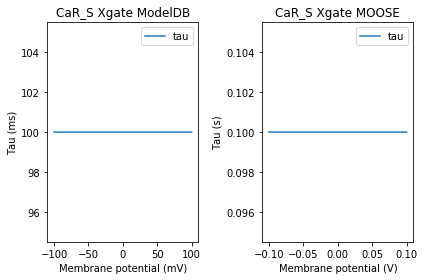

In [34]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, mtau, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('CaR_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateX.tableB))/gateX.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('CaR_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

### Ygate

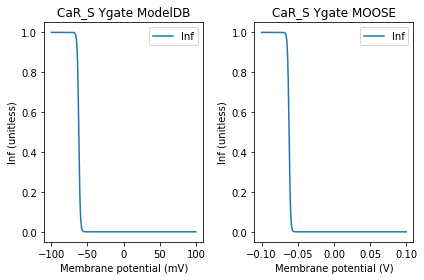

In [35]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, hinf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('CaR_S Ygate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateY = moose.element('/library/CaR_Schan/gateY')
plt.plot(Vv,gateY.tableA/gateY.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('CaR_S Ygate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

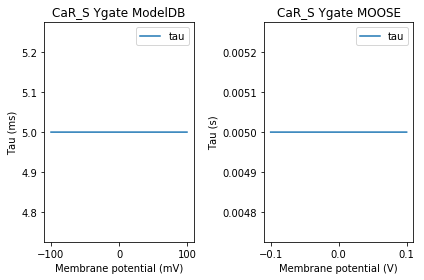

In [36]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, htau, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('CaR_S Ygate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateY.tableB))/gateY.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('CaR_S Ygate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

## CaL_SChan

In [36]:
celsius= 34
ki=.001
cai = 50.e-6
cao = 2
tfa = 5
eca = 140

h2 = ki/(ki+Ca)
alpm = 0.055*(-27.01 - Vmv)/(np.exp((-27.01-Vmv)/3.8) - 1)
betm =0.94*np.exp((-63.01-Vmv)/17)
a = alpm
taum = 1/(tfa*(a+betm))
minf = a/(a+betm)

print(f'The opening probability at Erest(-0.070V) is {minf[np.abs(Vmv + 70).argmin()] * h2[np.abs(Ca - 100e-6).argmin()]}')

The opening probability at Erest(-0.070V) is 1.8509399868180433e-05


### Xgate

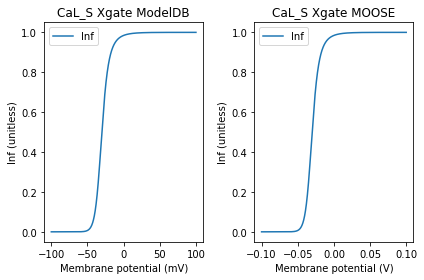

In [38]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, minf, label='Inf')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Inf (unitless)')
plt.title('CaL_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateX = moose.element('/library/CaL_Schan/gateX')
plt.plot(Vv,gateX.tableA/gateX.tableB, label='Inf')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Inf (unitless)')
plt.title('CaL_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

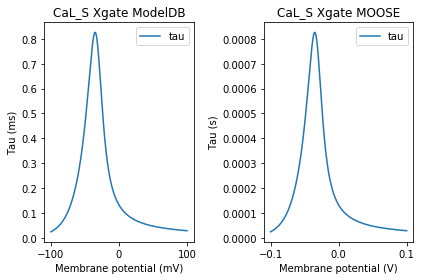

In [39]:
plt.subplot(1, 2, 1)
plt.plot(Vmv, taum, label='tau')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Tau (ms)')
plt.title('CaL_S Xgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Vv,np.ones(len(gateX.tableB))/gateX.tableB, label='tau')
plt.xlabel('Membrane potential (V)')
plt.ylabel('Tau (s)')
plt.title('CaL_S Xgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

### Zgate

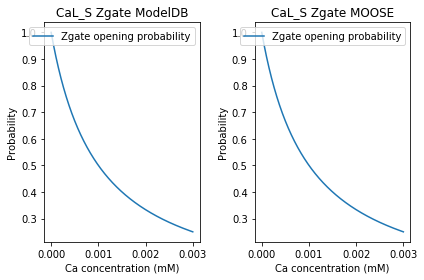

In [40]:
plt.subplot(1, 2, 1)
plt.plot(Ca, h2, label='Zgate opening probability')
plt.xlabel('Ca concentration (mM)')
plt.ylabel('Probability')
plt.title('CaL_S Zgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateZ = moose.element('/library/CaT_chan/gateZ')
plt.plot(Ca,gateZ.tableA, label='Zgate opening probability')
plt.xlabel('Ca concentration (mM)')
plt.ylabel('Probability')
plt.title('CaL_S Zgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

## KsAHP_Chan

In [41]:
celsius = 36
ek      = -80
cai     = 2.4e-5
gbar    = 0.01
beta    = 0.03
cac     = 0.025
taumin  = 0.5

tadj = 3**((celsius-22.0)/10)
car = (Ca/cac)**2
m_inf = car / ( 1 + car )
tau_m =  1 / beta / (1 + car) / tadj
tau_m[tau_m<taumin] = taumin

### Zgate

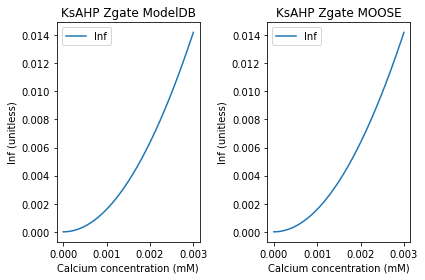

In [42]:
plt.subplot(1, 2, 1)
plt.plot(Ca, m_inf, label='Inf')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Inf (unitless)')
plt.title('KsAHP Zgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
gateZ = moose.element('/library/KsAHP_chan/gateZ')
plt.plot(Ca,gateZ.tableA/gateZ.tableB, label='Inf')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Inf (unitless)')
plt.title('KsAHP Zgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

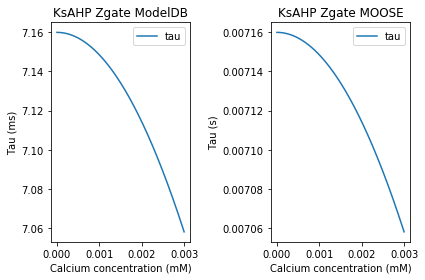

In [43]:
plt.subplot(1, 2, 1)
plt.plot(Ca, tau_m, label='tau')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Tau (ms)')
plt.title('KsAHP Zgate ModelDB')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Ca,np.ones(len(gateZ.tableB))/gateZ.tableB, label='tau')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Tau (s)')
plt.title('KsAHP Zgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

## KmAHP_Chan

In [44]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
print(find_nearest(Vv,-0.07))
celsius = 20
cai = 1e-3
d1 =1
d2 = 1.5
k1 = 0.18
k2 = 0.011
bbar = 0.28
abar = 0.48
F_KC = F/1000

def exp1(k,d,v):
    return k*np.exp(-2*d*F_KC*v/R/(273.15 + celsius))
def alp(v,c):
    return c*abar/(c + exp1(k1,d1,v))
def bet(v,c):
    return bbar/(1 + c/exp1(k2,d2,v))
def tau(v,c):
    return 1/(alp(v,c) + bet(v, c))
def oinf(v,c):
    return alp(v,c)*tau(v,c)
oinf(-75,100e-6)

-0.06999999999999706


2.5112840876361764e-06

### Zgate

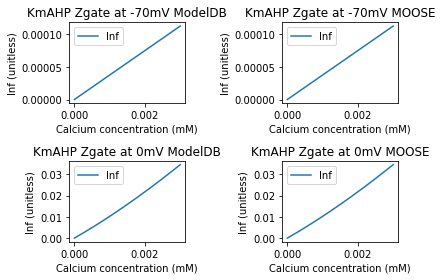

In [45]:
plt.subplot(2,2,1)
plt.plot(Ca,[oinf(-70,c) for c in Ca], label='Inf')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Inf (unitless)')
plt.title('KmAHP Zgate at -70mV ModelDB')
plt.legend()

plt.subplot(2,2,2)
gateZ = moose.element('/library/KmAHP_chan/gateZ')
idm70 = Vv.tolist().index(find_nearest(Vv,-0.07))
plt.plot(Ca,gateZ.tableA[idm70]/gateZ.tableB[idm70], label='Inf')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Inf (unitless)')
plt.title('KmAHP Zgate at -70mV MOOSE')
plt.legend()

plt.subplot(2,2,3)
plt.plot(Ca,[oinf(0,c) for c in Ca], label='Inf')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Inf (unitless)')
plt.title('KmAHP Zgate at 0mV ModelDB')
plt.legend()

plt.subplot(2,2,4)
id0 = Vv.tolist().index(find_nearest(Vv,0))
plt.plot(Ca,gateZ.tableA[id0]/gateZ.tableB[id0], label='Inf')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Inf (unitless)')
plt.title('KmAHP Zgate at 0mV MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

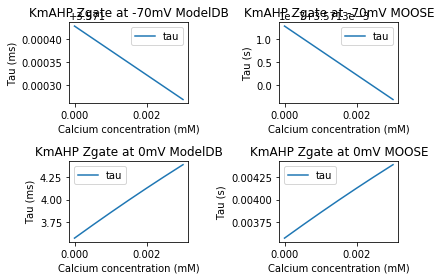

In [46]:
plt.subplot(2,2,1)
plt.plot(Ca,[tau(-70,c) for c in Ca], label='tau')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Tau (ms)')
plt.title('KmAHP Zgate at -70mV ModelDB')
plt.legend()

plt.subplot(2,2,2)
plt.plot(Ca,np.ones(len(gateZ.tableB[idm70]))/gateZ.tableB[idm70], label='tau')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Tau (s)')
plt.title('KmAHP Zgate at -70mV MOOSE')
plt.legend()

plt.subplot(2,2,3)
plt.plot(Ca,[tau(0,c) for c in Ca], label='tau')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Tau (ms)')
plt.title('KmAHP Zgate at 0mV ModelDB')
plt.legend()

plt.subplot(2,2,4)
plt.plot(Ca,np.ones(len(gateZ.tableB[id0]))/gateZ.tableB[id0], label='tau')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Tau (s)')
plt.title('KmAHP Zgate at 0mV MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

## KSK_Chan (only MOOSE)

### Zgate

ValueError: moose_element: '/library/KSK_chan/gateZ' does not exist!

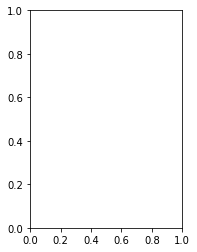

In [47]:
plt.subplot(1, 2, 1)
gateZ = moose.element('/library/KSK_chan/gateZ')
plt.plot(Ca,gateZ.tableA/gateZ.tableB, label='Inf')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Inf (unitless)')
plt.title('KsAHP Zgate MOOSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Ca,np.ones(len(gateZ.tableB))/gateZ.tableB, label='tau')
plt.xlabel('Calcium concentration (mM)')
plt.ylabel('Tau (s)')
plt.title('KsAHP Zgate MOOSE')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
print(f'')
print(f'The opening probability at Erest(-0.065V) is {(100e-6**4)/((100e-6**4)+(1.9e-4**4))}')


The opening probability at Erest(-0.065V) is 0.07126517057318577
